*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/2_function_distribution.ipynb)*

# Time Adverbial Distribution and Collocations
## Function Distribution
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Sat 13 Jun 2020 17:10:45 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [1]:
# see config.py for variables
# config.py is used across the notebooks 
# for the article project
from config import *

In [4]:
# load broad dataset for distribution analysis
phrase_df = pd.read_csv(broad_dataset) 
phrase_df.set_index('node', inplace=True)
phrase_df['parsed'] = phrase_df.index.isin(functs_df.index) * 1

# define sample of phrase functions for distribution
# analysis
functions_sample = sorted([
    'Adju',
    'Cmpl',
    'Loca',
    'Objc',
    'Subj',
    'Time',
])
funct_sample = phrase_df[phrase_df.s_function.isin(functions_sample)]

## Deviation of Proportions

Now we'll look to see how representative the datasample is across the<br>
Hebrew Bible. Have the selection requirements negatively affected any of the books?

In [5]:
# make a cross-tabulation from function to 
# book, n_pa, n_heads, and n_daughters to 
# enable selection of data as needed

by_book = pd.pivot_table(
    funct_sample, 
    index='s_function', 
    columns=['n_phrase_atoms', 'n_heads', 'n_relas', 'parsed', 'book'], 
    aggfunc='size', 
    fill_value=0
)

# result is a multi-index df
by_book.head()

n_phrase_atoms    1                                                ...  12  \
n_heads            1                                               ...   2   
n_relas            0                                               ...   0   
parsed             0                                               ...   0   
book           1 Kgs 1 Sam 2 Kgs 2 Sam Deut Eccl Ezek Gen Isa Jer  ... Gen   
s_function                                                         ...       
Adju               1     0     0     0    0    0    0   0   0   0  ...   0   
Cmpl               0     0     0     0    0    0    1   2   1   0  ...   1   
Loca               0     0     0     0    0    0    0   0   0   0  ...   0   
Objc               0     0     0     0    0    2    1   6   0   1  ...   0   
Subj               1     1     1     2    2   13    1   2   3   0  ...   0   

n_phrase_atoms                        13    14          15  16  
n_heads            4             5     4     5           1   6  
n_relas            0             0     0     0           0   0  
parsed             0             0     0     0           0   0  
book           1 Kgs 2 Chr Jer Gen 2 Kgs 1 Chr 2 Kgs 2 Chr Jer  
s_function                                                      
Adju               0     0   0   0     0     0     0     0   0  
Cmpl               1     0   0   0     0     0     0     0   0  
Loca               0     0   0   0     0     0     0     0   0  
Objc               0     1   0   0     0     0     1     1   0  
Subj               0     0   1   1     1     1     0     0   1  

[5 rows x 1108 columns]

### Does the sample selection affect book-by-book representation of functions?

In [6]:
# exp_prop is a table of ratios which state 
# what proportion of a function's total uses is represented within a given book
# the observed proportion will be that subset of phrases that fit our selection
# criteria, i.e. na=1, nh=1, nd=0
exp_freq = by_book.groupby(axis=1, level='book').sum() # group by book column
exp_prop = exp_freq.div(exp_freq.sum(1), 0)

# observed proportion is the ratio of the selected sample function's
# total representation within a given book: in this case only functions
# which have 1 atom, 1 head, 0 relas, and parse value of 1
obv_freq = by_book[(1, 1, 0, 1)] # select multindex
obv_prop = obv_freq.div(obv_freq.sum(1), 0)

# the deviation of proportions will be the DIFFERENCE between the expected ratios 
# (calculated across the whole dataset) and the ratios across the selected subset
# of phrases
deviation_prop = round(exp_prop - obv_prop, 2)

In [7]:
exp_freq

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,420,309,169,515,237,235,48,95,377,86,...,20,160,432,8,244,908,22,59,88,20
Cmpl,639,1342,1695,1273,1314,1229,225,253,1546,196,...,53,444,1603,29,532,1927,160,125,309,74
Loca,61,130,81,114,123,87,29,9,199,40,...,2,65,156,2,22,126,23,6,21,3
Objc,573,865,826,911,790,628,206,134,1055,190,...,51,284,1062,19,732,1998,75,56,200,65
Subj,1362,1318,1686,1167,1129,1380,187,222,1152,426,...,84,536,1520,39,1090,2127,148,183,356,76
Time,101,191,252,196,175,168,22,53,201,30,...,6,103,187,11,49,298,26,5,50,14


In [8]:
exp_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.044662,0.032858,0.017971,0.054764,0.025202,0.024989,0.005104,0.010102,0.040089,0.009145,...,0.002127,0.017014,0.045938,0.000851,0.025946,0.096555,0.002339,0.006274,0.009358,0.002127
Cmpl,0.021611,0.045387,0.057325,0.043053,0.044440,0.041565,0.007610,0.008557,0.052286,0.006629,...,0.001792,0.015016,0.054214,0.000981,0.017992,0.065172,0.005411,0.004228,0.010450,0.002503
Loca,0.023471,0.050019,0.031166,0.043863,0.047326,0.033474,0.011158,0.003463,0.076568,0.015391,...,0.000770,0.025010,0.060023,0.000770,0.008465,0.048480,0.008850,0.002309,0.008080,0.001154
Objc,0.025587,0.038626,0.036885,0.040681,0.035277,0.028043,0.009199,0.005984,0.047111,0.008484,...,0.002277,0.012682,0.047423,0.000848,0.032687,0.089220,0.003349,0.002501,0.008931,0.002903
Subj,0.043344,0.041944,0.053655,0.037138,0.035929,0.043917,0.005951,0.007065,0.036661,0.013557,...,0.002673,0.017058,0.048372,0.001241,0.034688,0.067689,0.004710,0.005824,0.011329,0.002419
Time,0.025012,0.047301,0.062407,0.048539,0.043338,0.041605,0.005448,0.013125,0.049777,0.007429,...,0.001486,0.025508,0.046310,0.002724,0.012135,0.073799,0.006439,0.001238,0.012382,0.003467


In [9]:
obv_freq

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,326,223,138,381,183,197,45,80,286,71,...,20,119,317,7,234,823,15,52,69,19
Cmpl,534,1102,1514,998,1122,1074,205,208,1265,181,...,52,375,1418,28,513,1808,147,106,272,65
Loca,51,101,74,92,102,79,29,9,137,39,...,2,51,131,2,19,112,23,6,17,3
Objc,382,636,688,615,583,499,185,105,755,149,...,50,206,814,18,687,1797,65,52,170,59
Subj,998,1038,1492,847,872,1107,167,182,798,365,...,77,330,1192,35,976,1950,129,161,316,69
Time,82,159,230,155,135,153,19,43,183,24,...,6,78,165,11,45,257,25,3,40,12


In [10]:
obv_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.041715,0.028535,0.017658,0.048752,0.023417,0.025208,0.005758,0.010237,0.036596,0.009085,...,0.002559,0.015227,0.040563,0.000896,0.029942,0.105310,0.001919,0.006654,0.008829,0.002431
Cmpl,0.020672,0.042660,0.058609,0.038634,0.043434,0.041576,0.007936,0.008052,0.048970,0.007007,...,0.002013,0.014517,0.054893,0.001084,0.019859,0.069991,0.005691,0.004103,0.010530,0.002516
Loca,0.023524,0.046587,0.034133,0.042435,0.047048,0.036439,0.013376,0.004151,0.063192,0.017989,...,0.000923,0.023524,0.060424,0.000923,0.008764,0.051661,0.010609,0.002768,0.007841,0.001384
Objc,0.021140,0.035196,0.038074,0.034034,0.032263,0.027615,0.010238,0.005811,0.041782,0.008246,...,0.002767,0.011400,0.045047,0.000996,0.038019,0.099447,0.003597,0.002878,0.009408,0.003265
Subj,0.038132,0.039661,0.057007,0.032363,0.033318,0.042297,0.006381,0.006954,0.030491,0.013946,...,0.002942,0.012609,0.045545,0.001337,0.037292,0.074507,0.004929,0.006152,0.012074,0.002636
Time,0.023577,0.045716,0.066130,0.044566,0.038815,0.043991,0.005463,0.012363,0.052616,0.006901,...,0.001725,0.022427,0.047441,0.003163,0.012938,0.073893,0.007188,0.000863,0.011501,0.003450


In [11]:
deviation_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.00,0.0,0.0,0.01,0.0,-0.0,-0.0,-0.0,0.00,0.0,...,-0.0,0.0,0.01,-0.0,-0.00,-0.01,0.0,-0.0,0.0,-0.0
Cmpl,0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,0.0,0.00,-0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,0.0,-0.0,-0.0
Loca,-0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,-0.0,0.01,-0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,-0.0,0.0,-0.0
Objc,0.00,0.0,-0.0,0.01,0.0,0.0,-0.0,0.0,0.01,0.0,...,-0.0,0.0,0.00,-0.0,-0.01,-0.01,-0.0,-0.0,-0.0,-0.0
Subj,0.01,0.0,-0.0,0.00,0.0,0.0,-0.0,0.0,0.01,-0.0,...,-0.0,0.0,0.00,-0.0,-0.00,-0.01,-0.0,-0.0,-0.0,-0.0
Time,0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,0.0,-0.00,0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,0.0,0.0,0.0


In [12]:
deviation_prop.abs().sum(0).sort_values(ascending=False)[:15]

book
Deut     0.03
Ps       0.03
2 Chr    0.02
Isa      0.02
Job      0.02
Jer      0.01
Josh     0.01
Gen      0.01
1 Chr    0.01
Prov     0.01
Num      0.01
Ezra     0.00
1 Kgs    0.00
1 Sam    0.00
Song     0.00
dtype: float64

In [13]:
deviation_prop.mean(0)

book
1 Chr    0.001667
1 Kgs    0.000000
1 Sam    0.000000
2 Chr    0.003333
2 Kgs    0.000000
2 Sam    0.000000
Amos     0.000000
Dan      0.000000
Deut     0.005000
Eccl     0.000000
Esth     0.000000
Exod     0.000000
Ezek     0.000000
Ezra     0.000000
Gen     -0.001667
Hab      0.000000
Hag      0.000000
Hos      0.000000
Isa     -0.003333
Jer      0.001667
Job     -0.003333
Joel     0.000000
Jonah    0.000000
Josh     0.001667
Judg     0.000000
Lam      0.000000
Lev      0.000000
Mal      0.000000
Mic      0.000000
Nah      0.000000
Neh      0.000000
Num      0.001667
Obad     0.000000
Prov    -0.001667
Ps      -0.005000
Ruth     0.000000
Song     0.000000
Zech     0.000000
Zeph     0.000000
dtype: float64

**Based on this data, we can say that the filtered selection of phrase functions<br>
does not negatively affect representation across the Hebrew Bible. The deviation<br>
of proportions is very small across both book and function categories.**

### How evenly distributed is Time compared to the other key functions? (DP)

We can answer this question using DP (Gries 2008), the Degree of Dispersion.<br>

For a given sample (e.g. Hebrew Bible), divide the sample into its various parts (books).<br> 
Use a baseline (e.g. n-phrases) to calculate what proportion each part *should* account<br>
for in the dataset. And compare the observed proportion for a given variable (in this case<br>
function).

In [14]:
# expected proportional representation of total number 
# of phrases for any given book; retrieved by dividing 
# a book's total phrases by the marginal total of all books' n-phrases
book_exp_props = exp_freq.sum(0) / exp_freq.sum(0).sum()

# observed proportional representation for any given book
# of a given function's total occurrences
book_obv_prop = exp_freq.div(exp_freq.sum(1), 0)

# calculate the deviation of proportion of the observed
# proportional representation from the expected proportion
book_dev_prop = book_obv_prop.sub(book_exp_props, 1)

# calculate DP score following Gries 2008 by summing absolute
# value of all deviations per function and dividing by 2
# the resulting score ranges from 0 to 1 where 0 is the 
# hypothetical perfectly distributed function and 1 is the 
# hypothetical worst distributed function
book_DP = abs(book_dev_prop).sum(1) / 2
book_DP = book_DP.sort_values()

In [15]:
book_exp_props.sort_values(ascending=False)

book
Ps       0.074266
Gen      0.069861
Jer      0.066200
Ezek     0.061513
Isa      0.059019
Exod     0.056384
Num      0.049886
1 Sam    0.047362
Deut     0.045562
2 Chr    0.042001
1 Kgs    0.041790
Lev      0.038742
2 Kgs    0.037898
2 Sam    0.037485
Judg     0.034146
Job      0.032537
1 Chr    0.031742
Josh     0.029771
Prov     0.026844
Neh      0.016012
Zech     0.010299
Esth     0.009887
Eccl     0.009736
Hos      0.009132
Dan      0.007704
Amos     0.007211
Ezra     0.007161
Lam      0.006206
Mic      0.005280
Ruth     0.004566
Song     0.004365
Joel     0.003550
Mal      0.003269
Hab      0.002675
Jonah    0.002625
Zeph     0.002535
Nah      0.002172
Hag      0.001519
Obad     0.001086
dtype: float64

In [16]:
book_dev_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.012920,-0.008932,-0.029391,0.012763,-0.012695,-0.012496,-0.002107,0.002398,-0.005472,-0.000591,...,-0.000046,0.001002,-0.003948,-0.000236,-0.000898,0.022288,-0.002227,0.001909,-0.000941,-0.000408
Cmpl,-0.010131,0.003597,0.009964,0.001052,0.006542,0.004080,0.000398,0.000852,0.006725,-0.003107,...,-0.000380,-0.000996,0.004328,-0.000105,-0.008852,-0.009094,0.000845,-0.000138,0.000151,-0.000032
Loca,-0.008272,0.008229,-0.016196,0.001862,0.009428,-0.004011,0.003947,-0.004241,0.031006,0.005655,...,-0.001403,0.008998,0.010137,-0.000317,-0.018379,-0.025786,0.004283,-0.002056,-0.002219,-0.001380
Objc,-0.006155,-0.003163,-0.010477,-0.001321,-0.002620,-0.009442,0.001987,-0.001720,0.001549,-0.001251,...,0.000105,-0.003330,-0.002463,-0.000238,0.005843,0.014954,-0.001217,-0.001864,-0.001368,0.000368
Subj,0.011602,0.000154,0.006293,-0.004863,-0.001968,0.006432,-0.001260,-0.000639,-0.008900,0.003821,...,0.000501,0.001046,-0.001514,0.000155,0.007844,-0.006577,0.000144,0.001459,0.001030,-0.000116
Time,-0.006730,0.005511,0.015045,0.006538,0.005441,0.004120,-0.001763,0.005421,0.004216,-0.002306,...,-0.000687,0.009496,-0.003576,0.001638,-0.014709,-0.000467,0.001873,-0.003127,0.002083,0.000933


In [17]:
book_DP

s_function
Subj    0.052327
Objc    0.060091
Cmpl    0.072066
Time    0.098677
Loca    0.145742
Adju    0.156223
dtype: float64

**Time**

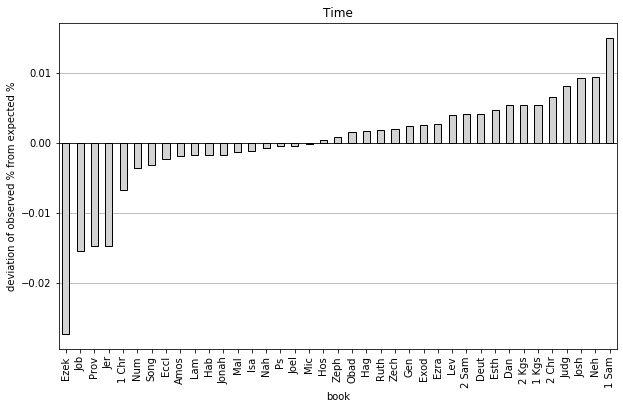

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
book_dev_prop.loc['Time'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Time')
savefig('DP_book_Time')
plt.show()

In [19]:
book_dev_prop.loc['Time'].abs().sort_values(ascending=False)

book
Ezek     0.027338
Job      0.015449
1 Sam    0.015045
Prov     0.014709
Jer      0.014689
Neh      0.009496
Josh     0.009357
Judg     0.008202
1 Chr    0.006730
2 Chr    0.006538
1 Kgs    0.005511
2 Kgs    0.005441
Dan      0.005421
Esth     0.004724
Deut     0.004216
2 Sam    0.004120
Lev      0.004101
Num      0.003576
Song     0.003127
Ezra     0.002745
Exod     0.002556
Gen      0.002452
Eccl     0.002306
Zech     0.002083
Ruth     0.001873
Amos     0.001763
Lam      0.001748
Hag      0.001701
Hab      0.001685
Obad     0.001638
Jonah    0.001634
Mal      0.001288
Isa      0.001069
Zeph     0.000933
Nah      0.000687
Hos      0.000526
Ps       0.000467
Joel     0.000331
Mic      0.000080
Name: Time, dtype: float64

**Adjunct**

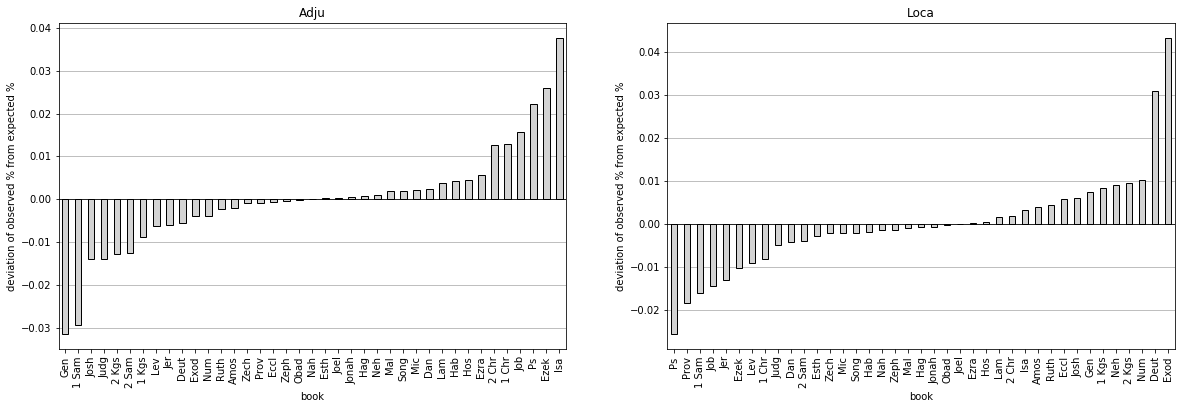

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax = ax1
book_dev_prop.loc['Adju'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Adju')

ax=ax2
book_dev_prop.loc['Loca'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Loca')

savefig('DP_book_Adju_Loca')

plt.show()

In [21]:
book_dev_prop.loc['Adju'].abs().sort_values(ascending=False)

book
Isa      0.037642
Gen      0.031579
1 Sam    0.029391
Ezek     0.026003
Ps       0.022288
Job      0.015634
Josh     0.014033
Judg     0.013942
1 Chr    0.012920
2 Chr    0.012763
2 Kgs    0.012695
2 Sam    0.012496
1 Kgs    0.008932
Lev      0.006203
Jer      0.006119
Ezra     0.005599
Deut     0.005472
Hos      0.004372
Hab      0.004343
Exod     0.003959
Num      0.003948
Lam      0.003684
Dan      0.002398
Ruth     0.002227
Amos     0.002107
Mic      0.002057
Song     0.001909
Mal      0.001835
Neh      0.001002
Zech     0.000941
Prov     0.000898
Hag      0.000714
Eccl     0.000591
Jonah    0.000565
Zeph     0.000408
Joel     0.000278
Obad     0.000236
Esth     0.000215
Nah      0.000046
Name: Adju, dtype: float64

In [22]:
book_dev_prop.loc['Loca'].abs().sort_values(ascending=False)

book
Exod     0.043270
Deut     0.031006
Ps       0.025786
Prov     0.018379
1 Sam    0.016196
Job      0.014453
Jer      0.013103
Ezek     0.010340
Num      0.010137
2 Kgs    0.009428
Lev      0.009116
Neh      0.008998
1 Chr    0.008272
1 Kgs    0.008229
Gen      0.007476
Josh     0.006012
Eccl     0.005655
Judg     0.004904
Ruth     0.004283
Dan      0.004241
2 Sam    0.004011
Amos     0.003947
Isa      0.003313
Esth     0.002961
Zech     0.002219
Mic      0.002202
Song     0.002056
Hab      0.001906
2 Chr    0.001862
Lam      0.001490
Nah      0.001403
Zeph     0.001380
Mal      0.000960
Hag      0.000749
Jonah    0.000701
Hos      0.000487
Obad     0.000317
Ezra     0.000149
Joel     0.000088
Name: Loca, dtype: float64

### DP by chapter

In [23]:
funct_sample2 = funct_sample.copy()
funct_sample2['chapter_node'] = [L.u(ph,'chapter')[0] for ph in funct_sample.index]

In [26]:
chapt_counts = pd.pivot_table(
    funct_sample2,
    index='s_function',
    columns=['chapter_node'],
    aggfunc='size',
    fill_value=0,
)

chapt_counts

chapter_node,426624,426625,426626,426627,426628,426629,426630,426631,426632,426633,...,427543,427544,427545,427546,427547,427548,427549,427550,427551,427552
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,15,4,9,3,4,6,9,5,9,16,...,4,19,28,21,22,22,13,17,27,13
Cmpl,28,31,40,34,3,26,20,27,33,16,...,9,48,37,41,25,58,38,66,42,36
Loca,4,3,2,1,0,7,5,2,4,3,...,5,5,1,3,4,1,8,2,2,3
Objc,38,29,24,36,38,23,10,17,20,15,...,6,25,36,31,23,43,30,50,22,28
Subj,62,41,38,48,35,39,35,32,34,37,...,12,32,56,34,23,48,25,36,38,25
Time,1,5,5,4,19,4,11,16,4,4,...,4,6,8,11,2,6,5,5,11,7


In [27]:
ch_exp_prop = chapt_counts.sum(0) / chapt_counts.sum(0).sum()
ch_obv_prop = chapt_counts.div(chapt_counts.sum(1), 0)
ch_dev_prop = ch_obv_prop.sub(ch_exp_prop, 1)
ch_DP = abs(ch_dev_prop).sum(1) / 2
ch_DP = ch_DP.sort_values()

ch_DP

s_function
Subj    0.106349
Cmpl    0.115363
Objc    0.125961
Adju    0.231940
Time    0.287039
Loca    0.343980
dtype: float64

### DP determined using clause clusters

In [28]:
# build clusters of clauses into a column that can be added DF
cluster_size = 50
cl_clusters = []
this_cluster = []
for cl in F.otype.s('clause'):
    this_cluster.append(cl)
    if len(this_cluster) == cluster_size:
        cl_clusters.append(this_cluster)
        this_cluster = []
cl_clusters.append(this_cluster) # finish the last short cluster
        
print(len(cl_clusters), 'clusters of size', cluster_size, 'built')
print(len(cl_clusters[-1]), 'short cluster added')

# map clustesr to sets of clauses
# that can be used for membership checks
clauses_2_id = []
for i, cluster in enumerate(cl_clusters):
    clauses_2_id.append((set(cluster), i))

# make a new column for the DF that maps a phrase 
# to its clause cluster group
phrase_clust_group = []
for ph in funct_sample.index:
    cl = L.u(ph, 'clause')[0]
    for clauses, cluster in clauses_2_id:
        if cl in clauses:
            phrase_clust_group.append(cluster)
            continue
            
print(len(phrase_clust_group), 'phrases assigned to clusters')

1763 clusters of size 50 built
21 short cluster added
99426 phrases assigned to clusters


In [29]:
funct_sample3 = funct_sample.copy()
funct_sample3['cl_cluster'] = phrase_clust_group

In [31]:
cl_counts = pd.pivot_table(
    funct_sample3,
    index='s_function',
    columns=['cl_cluster'],
    aggfunc='size',
    fill_value=0,
)
cl_counts

cl_cluster,0,1,2,3,4,5,6,7,8,9,...,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,3,10,3,2,5,4,1,0,6,1,...,14,6,6,4,5,12,20,3,10,2
Cmpl,10,11,13,17,18,22,19,19,4,3,...,16,22,18,22,24,23,14,26,25,5
Loca,1,3,0,3,0,2,0,1,0,0,...,1,4,3,2,0,1,1,0,2,1
Objc,14,14,18,15,7,12,16,18,27,23,...,17,17,9,21,15,19,14,9,13,8
Subj,31,23,21,21,21,17,19,23,23,22,...,19,9,13,10,15,13,25,16,10,9
Time,1,0,4,1,0,3,3,2,8,12,...,3,3,4,1,0,2,8,4,3,2


In [32]:
cl_exp_prop = cl_counts.sum(0) / cl_counts.sum(0).sum()
cl_obv_prop = cl_counts.div(cl_counts.sum(1), 0)
cl_dev_prop = cl_obv_prop.sub(cl_exp_prop, 1)
cl_DP = abs(cl_dev_prop).sum(1) / 2
cl_DP = cl_DP.sort_values()

cl_DP

s_function
Subj    0.124682
Cmpl    0.128643
Objc    0.149135
Adju    0.262245
Time    0.350534
Loca    0.422339
dtype: float64

### subplots of book, chapter, and cluster DP

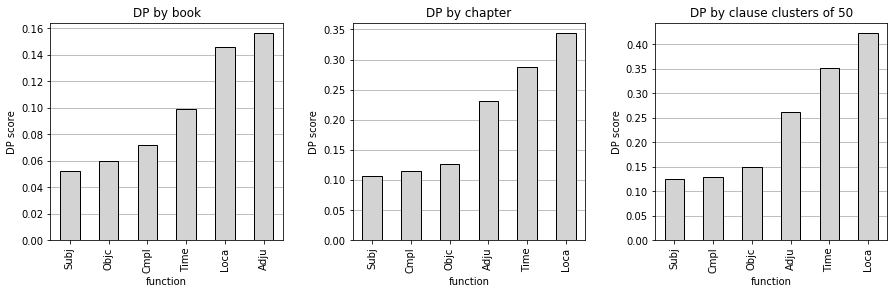

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs = axs.ravel()
titles = ['DP by book', 'DP by chapter', 'DP by clause clusters of 50']
plt.subplots_adjust(wspace=0.3)

all_dps = [book_DP, ch_DP, cl_DP]

for i, dp in enumerate(all_dps):
    ax=axs[i]
    dp.plot(kind='bar', ax=ax, color='lightgrey', edgecolor='black')
    ax.set_xlabel('function')
    ax.set_ylabel('DP score')
    ax.grid(axis='y')
    ax.set_axisbelow(True) 
    ax.set_title(titles[i])

savefig('DP_functions')

In [34]:
DP_book_ch_cl = pd.concat(all_dps, 1, sort=True)
DP_book_ch_cl.columns = ['book DP', 'chapter DP', 'clause cl. DP']
DP_book_ch_cl = DP_book_ch_cl.loc[DP_book_ch_cl.sum(1).sort_values().index]

#DP_book_ch_cl.round(2).to_clipboard()

DP_book_ch_cl

,book DP,chapter DP,clause cl. DP
Subj,0.052327,0.106349,0.124682
Cmpl,0.072066,0.115363,0.128643
Objc,0.060091,0.125961,0.149135
Adju,0.156223,0.231940,0.262245
Time,0.098677,0.287039,0.350534
Loca,0.145742,0.343980,0.422339
